<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Natural_Language_Processing/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-07-18 17:42:01--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2022-07-18 17:42:01 (23.1 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [49]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [50]:
df = pd.read_csv('spam.csv', encoding ='ISO-8859-1')

In [51]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1)

In [53]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.columns = ['labels', 'data']

In [55]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam' :1})
Y = df['b_labels'].values

In [57]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [58]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [59]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [60]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.'% V)

Found 7136 unique tokens.


In [61]:
data_train = pad_sequences(sequences_train)
print('shape of data train tensor:', data_train.shape)
T = data_train.shape[1]

shape of data train tensor: (3733, 189)


In [62]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('shape of data train tensor:', data_test.shape)


shape of data train tensor: (1839, 189)


In [63]:
#create a model

# we get to choose embedding dimensionality
D = 20

#Hidden state dimensionality
M = 15

i = Input(shape=(T,))
x = Embedding(V+1, D)(i) # first index starts from 1 
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [68]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

print('training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
  
)

training model...
Epoch 1/10
117/117 [==============================] - 10s 61ms/step - loss: 0.4434 - accuracy: 0.8693 - val_loss: 0.3872 - val_accuracy: 0.8592
Epoch 2/10
117/117 [==============================] - 8s 65ms/step - loss: 0.3200 - accuracy: 0.8693 - val_loss: 0.2789 - val_accuracy: 0.8592
Epoch 3/10
117/117 [==============================] - 7s 60ms/step - loss: 0.2248 - accuracy: 0.8693 - val_loss: 0.2195 - val_accuracy: 0.8592
Epoch 4/10
117/117 [==============================] - 7s 63ms/step - loss: 0.1712 - accuracy: 0.9121 - val_loss: 0.1742 - val_accuracy: 0.9587
Epoch 5/10
117/117 [==============================] - 8s 69ms/step - loss: 0.1229 - accuracy: 0.9890 - val_loss: 0.1334 - val_accuracy: 0.9717
Epoch 6/10
117/117 [==============================] - 7s 58ms/step - loss: 0.0801 - accuracy: 0.9925 - val_loss: 0.1020 - val_accuracy: 0.9788
Epoch 7/10
117/117 [==============================] - 7s 60ms/step - loss: 0.0515 - accuracy: 0.9941 - val_loss: 0.0838 - v

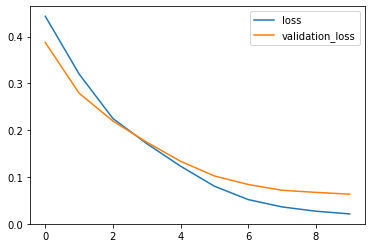

In [70]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'validation_loss')
plt.legend()